In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial
import utm #pip install utm
from pylab import rcParams
rcParams['figure.figsize'] = 10,10

<h2>Clean Parking Meters Location Data</h2>
<p>Just selected and saved columns for Pole ID, Longitude, and Latitude data</p>

In [6]:
meters_df = pd.read_csv('raw_parking_meter_location.csv')
meters_loc_df = meters_df[['pole','longitude','latitude']]

#Cleaned traffic meter location data with just latitude and longitude
meters_loc_df.to_csv('clean_parking_meter_location.csv')

FileNotFoundError: File b'raw_parking_meter_location.csv' does not exist

In [7]:
#CLEAN BUSSTOP AND POTHOLE DATA

bus_data = np.load('busDistances.npy')
# bus_data = bus_data[~np.isnan(bus_data).any(axis=0)]

# bus_data = bus_data[~np.isnan(bus_data)]
# bus_data[np.isnan(bus_data)] = 1
print(bus_data.shape)
bus_data

(6638, 2574)


array([[ 0.00120084,  0.00142537,  0.00101214, ...,  0.00207357,
         0.00219888,         nan],
       [ 0.00098614,  0.00190658,  0.00049701, ...,  0.0010194 ,
         0.00076846,         nan],
       [ 0.00097247,  0.00189435,  0.00049265, ...,  0.00100212,
         0.00076064,         nan],
       ..., 
       [ 0.0031686 ,  0.00369702,  0.00336195, ...,  0.00224049,
         0.00236664,         nan],
       [ 0.00315195,  0.00368499,  0.00334207, ...,  0.00222211,
         0.00234378,         nan],
       [ 0.0032538 ,  0.00406697,  0.00312851, ...,  0.00234244,
         0.00194056,         nan]])

In [4]:
meter_data = np.load('meterDistances.npy')
meter_data[np.isnan(meter_data)] = 1
min_dist_indices_meter = np.zeros(meter_data.shape[0])
for i in range(0,meter_data.shape[0]):
    min_dist_indices_meter[i] = np.argmin(meter_data[i])

#ASSOCIATE MINIMUM INDICES

min_dist_indices_meter = np.zeros(bus_data.shape[0])
for i in range(0,meter_data.shape[0]):
    min_dist_indices_meter[i] = np.argmin(meter_data[i])

plt.figure(figsize=(10,10))
plt.hist(min_dist_indices_meter, 25)
plt.title('Pothole to nearest Meter Distances')
plt.show(_)

FileNotFoundError: [Errno 2] No such file or directory: 'meterDistances.npy'

In [256]:
#Recalculate bus distances
open_pot = pd.read_csv('Pr_087/clean_data/cleaned_get_it_done_open_potholes.csv')
open_pot = open_pot[~np.isnan(open_pot['long'])]
open_pot = open_pot[open_pot['long'] != 0]
bus_stops = pd.read_csv('Pr_087/clean_data/clean_bus_stops.csv')
bus_stops = bus_stops[~np.isnan(bus_stops['LONGITUDE'])]
bus_stops = bus_stops[bus_stops['LONGITUDE'] != 0]

In [257]:
open_pot_coordinates = np.asarray(open_pot[['lat','long']])
bus_stops_coordinates = np.asarray(bus_stops[['LATITUDE','LONGITUDE']])
#Convert from degrees of lat,long to utm (cartesian mercator projection)

def latlon_to_utm(coords):
    _ = np.zeros((coords.shape[0],coords.shape[1]))
    for i in range(0,_.shape[0]):
        conv = utm.from_latlon(coords[i][0],coords[i][1])
        _[i][0] = conv[0]
        _[i][1] = conv[1]
    return _

open_pot_coordinates = latlon_to_utm(open_pot_coordinates)
bus_stops_coordinates = latlon_to_utm(bus_stops_coordinates)

#remove outlier
open_pot_coordinates = np.delete(open_pot_coordinates, 2293 ,axis=0) 

In [2]:
dist_bus_data = scipy.spatial.distance.cdist(open_pot_coordinates,bus_stops_coordinates)
min_dist_indices = np.zeros(dist_bus_data.shape[0])
min_dists = np.zeros(dist_bus_data.shape[0])

for i in range(0,dist_bus_data.shape[0]):
    _ = np.argmin(dist_bus_data[i])
    min_dists[i] = dist_bus_data[i][_]
    min_dist_indices[i] = _   
    #Filter outliers
#     if dist_bus_data[i][_] > 7160:
#         print('WTF',i,':',dist_bus_data[i][_])

plt.close()
plt.figure(figsize=(10,10))
# plt.hist(np.log(min_dists), 50)
plt.hist(np.log(min_dists),50)
plt.title('Distances of Potholes to nearest Bus Stop')
plt.xlabel('Distance in meters (logged)')
# plt.xlabel('Distance in meters')
plt.ylabel('Occurrences')
plt.show()
plt.close()
print('Mean:',np.mean(min_dists))

NameError: name 'open_pot_coordinates' is not defined

27768.1820953


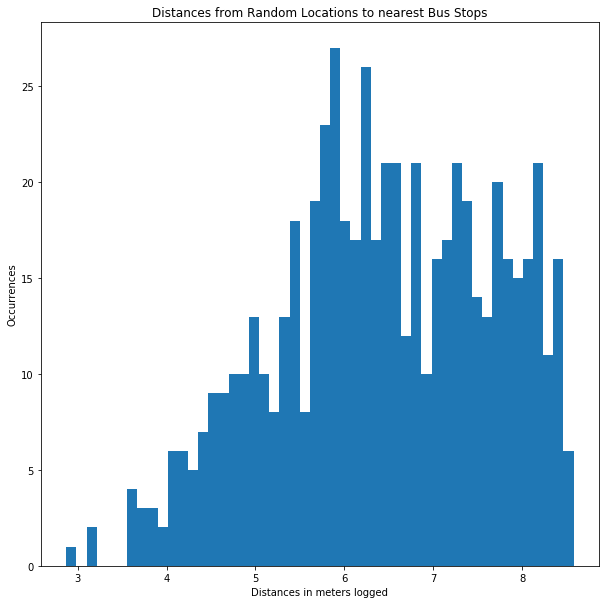

Mean: 1167.28134835


In [265]:
plt.close()
plt.close()
random_points = pd.read_csv('Pr_087/clean_data/randomPoints.csv')
random_points_coordinates = np.asarray(random_points[['Y','X']])
random_points_coordinates = latlon_to_utm(random_points_coordinates)
dist_bus_data = scipy.spatial.distance.cdist(random_points_coordinates,bus_stops_coordinates)
print(np.mean(dist_bus_data))
min_dist_indices = np.zeros(bus_data.shape[0])
min_dists = np.zeros(dist_bus_data.shape[0])
for i in range(0,bus_data.shape[0]):
    _ = np.argmin(dist_bus_data[i])
    min_dists[i] = dist_bus_data[i][_]
    min_dist_indices[i] = _    
plt.figure(figsize=(10,10))
plt.hist(np.log(min_dists), 50)
# plt.hist(min_dists, 50)
plt.title('Distances from Random Locations to nearest Bus Stops')
plt.xlabel('Distances in meters logged')
# plt.xlabel('Distances in meters')
plt.ylabel('Occurrences')
plt.show()
plt.close()
print('Mean:',np.mean(min_dists))

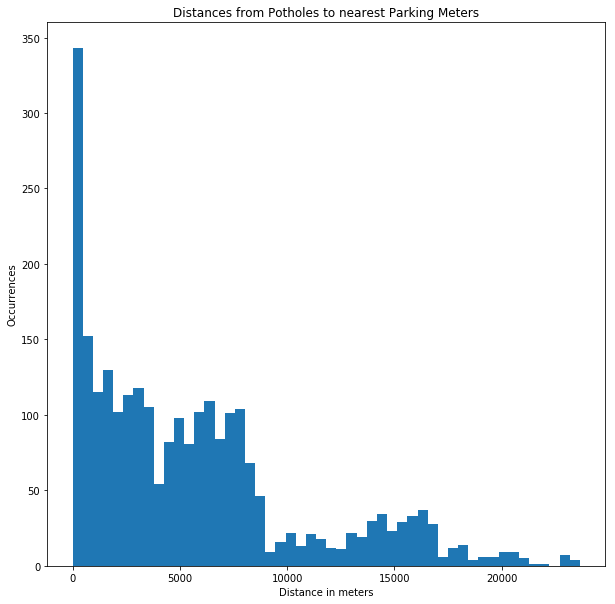

Mean: 5631.00322684


In [267]:
#Recalculate meter distances
open_pot = pd.read_csv('Pr_087/clean_data/cleaned_get_it_done_open_potholes.csv')
open_pot = open_pot[~np.isnan(open_pot['long'])]
open_pot = open_pot[open_pot['long'] != 0]

meter_data = pd.read_csv('Pr_087/raw_data/raw_parking_meter_location.csv')
meter_data = meter_data[~np.isnan(meter_data['longitude'])]
meter_data = meter_data[meter_data['longitude'] != 0]

open_pot_coordinates = np.asarray(open_pot[['lat','long']])
meter_data_coordinates = np.asarray(meter_data[['latitude','longitude']])

#remove outlier
open_pot_coordinates = np.delete(open_pot_coordinates, 2293 ,axis=0) 

#Convert to utm
open_pot_coordinates = latlon_to_utm(open_pot_coordinates)
meter_data_coordinates = latlon_to_utm(meter_data_coordinates)

dist_meter_data = scipy.spatial.distance.cdist(open_pot_coordinates,meter_data_coordinates)
min_dist_indices = np.zeros(dist_meter_data.shape[0])
min_dists = np.zeros(dist_meter_data.shape[0])
for i in range(0,dist_meter_data.shape[0]):
    _ = np.argmin(dist_meter_data[i])
    min_dists[i] = dist_meter_data[i][_]
    min_dist_indices[i] = _    
    
min_dists2 = np.zeros(dist_meter_data.shape[1])
for j in range(0,dist_meter_data.shape[1]):
    _ = np.argmin(dist_meter_data.T[j])
    min_dists2[j] = dist_meter_data[_][j]
#merge meters with min dist to pothole
meter_data['nearest_pothole_dist'] = min_dists2
meter_data.to_csv('TimLeeBro.csv')
    
plt.close()
plt.figure(figsize=(10,10))
# plt.hist(np.log(min_dists), 50)
plt.hist(min_dists, 50)
plt.title('Distances from Potholes to nearest Parking Meters')
# plt.xlabel('Distance in meters (logged)')
plt.xlabel('Distance in meters')
plt.ylabel('Occurrences')
plt.show()
plt.close()
print('Mean:',np.mean(min_dists))

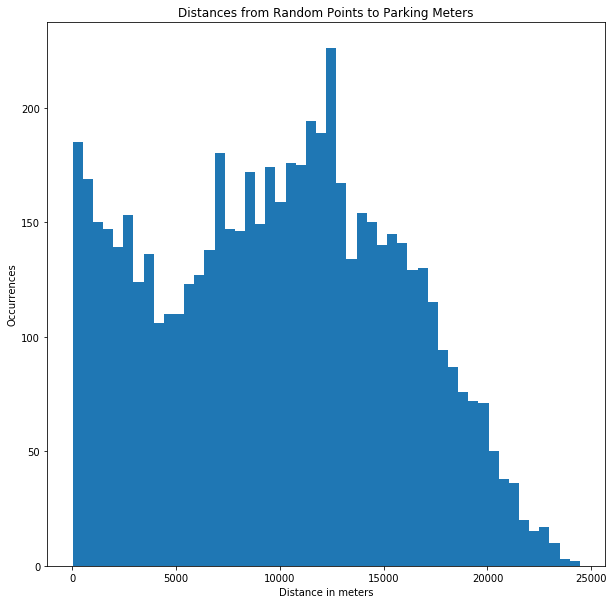

Mean: 9929.27048409


In [264]:
#Recalculate Random meter distances
random_points = pd.read_csv('Pr_087/clean_data/randPoints6000.csv')
random_points_coordinates = np.asarray(random_points[['Y','X']])

#convert to utm
random_points_coordinates = latlon_to_utm(random_points_coordinates)

dist_meter_data = scipy.spatial.distance.cdist(random_points_coordinates,meter_data_coordinates)
min_dist_indices = np.zeros(dist_meter_data.shape[0])
min_dists = np.zeros(dist_meter_data.shape[0])
for i in range(0,dist_meter_data.shape[0]):
    _ = np.argmin(dist_meter_data[i])
    min_dists[i] = dist_meter_data[i][_]
    min_dist_indices[i] = _    

plt.close()
plt.figure(figsize=(10,10))
# plt.hist(np.log(min_dists), 50)
plt.hist(min_dists, 50)
plt.title('Distances from Random Points to Parking Meters')
# plt.xlabel('Distance in meters (Logged)')
plt.xlabel('Distance in meters')
plt.ylabel('Occurrences')
plt.show()
plt.close()
print('Mean:',np.mean(min_dists))

In [195]:
aa = np.zeros((5,2,))
bb = np.ones((5,2,))*2
bb.T[0] = 0
test_res = scipy.spatial.distance.cdist(aa,bb)
test_res

array([[ 2.,  2.,  2.,  2.,  2.],
       [ 2.,  2.,  2.,  2.,  2.],
       [ 2.,  2.,  2.,  2.,  2.],
       [ 2.,  2.,  2.,  2.,  2.],
       [ 2.,  2.,  2.,  2.,  2.]])

In [277]:
all_closed = pd.DataFrame.from_csv('Pr_087/clean_data/complete_closed.csv')
all_closed = all_closed[~np.isnan(all_closed['long'])]
all_closed = all_closed[all_closed['long'] != 0]

all_open = pd.read_csv('Pr_087/clean_data/cleaned_get_it_done_open_potholes.csv')
all_open = all_open[~np.isnan(all_open['long'])]
all_open = all_open[all_open['long'] != 0]

all_closed.append(all_open)

ValueError: Plan shapes are not aligned

shape 16527


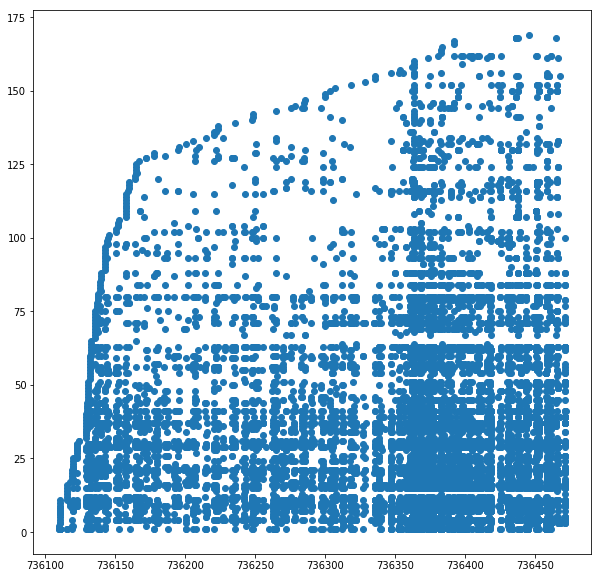

In [315]:
import matplotlib.dates as dates
closed_neighborhoods = pd.DataFrame.from_csv('Pr_087/clean_data/Combined_Closed_Neighb.csv')
print('shape',closed_neighborhoods.shape[0])
# _1 = dates.datestr2num(closed_neighborhoods['closed_date'])
_1 = np.zeros(closed_neighborhoods.shape[0])
for i in range(0,_1.shape[0]):
    _1[i] = dates.datestr2num(closed_neighborhoods['closed_date'][i])
fig1 = plt.figure()
plt.scatter(_1,closed_neighborhoods['Neighborhood_Val'])
plt.show()

In [299]:
closed_neighborhoods[['index','Neighborhood','closed_date','coordinates','lat','long','Neighborhood_Val']]

,index,Neighborhood,closed_date,coordinates,lat,long,Neighborhood_Val
0,0,Clairemont Mesa East,2016-05-25 18:43:00,32.7499397362632-117.1604238245755,32.749940,-117.160424,1
1,1,Clairemont Mesa East,2016-05-25 22:37:00,32.75000864226892-117.15906017908964,32.750009,-117.159060,1
2,2,Del Mar Heights,2016-05-25 22:37:00,32.95591580444838-117.25215208584706,32.955916,-117.252152,2
3,3,Clairemont Mesa East,2016-05-26 00:04:00,32.547334918542404-117.03421818981398,32.547335,-117.034218,1
4,24,MIddletown,2016-05-27 00:02:00,32.8291929-117.188534,32.829193,-117.188534,3
5,23,Clairemont Mesa East,2016-05-27 00:02:00,32.828018-117.186413,32.828018,-117.186413,1
6,22,Mira Mesa,2016-05-27 00:02:00,32.90744733004472-117.15443802153197,32.907447,-117.154438,4
7,21,MIddletown,2016-05-27 00:02:00,32.8284729-117.1874379,32.828473,-117.187438,3
8,20,North Clairemont,2016-05-27 00:02:00,32.8377014-117.1960496,32.837701,-117.196050,5
9,19,Clairemont Mesa East,2016-05-27 00:02:00,37.2786756-122.0269303,37.278676,-122.026930,1
